# House Price Advanced Regression

### Summary

The aim of this project is to predict sale price for houses with the 79 features on each house contained in the dataset from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview). The two main parts of this project are data preprocessing and model fitting. For preprocessing, the following techniques are implemented:
- examination, 
- visualisation, 
- missing data and outlier management, and
- feature engineering of the training data.

For model fitting:
- model selection, and
- hyper-parameter tuning are implemented.

The success of the model is measured through evaluating the Root Mean Squared Error (RMSE) of sale price predictions.

### Data

- train.csv: contains 79 descriptive features from 1460 houses to be used to predict sale price, being the target feature.
- test.csv: contains 79 descriptive features from 1459 houses without the associated sales price.
- data_description.csv: full description for each feature

### Contents

- [Data Exploration](#DE) <br>
    - [Datafile Summary](#DS) <br>
        - [All Features in dataset](#AFD) <br>
        - [Descriptive Statistics for Numeric Features](#DSN) <br>
        - [Descriptive Statistics for Categorical Features](#DSC) <br>
    - [Visualisation](#V) <br>
        - [Missing data](#MS) <br>
        - [Correlations](#C) <br>
- [Preprocessing](#P) <br>
    - [Feature Engineering](#FE) <br>
        - [Garage Utility](#GU) <br>
        - [Total Square Feet](#TSF) <br>
    - [Handling Missing Values](#HM) <br>
        - [Numeric](#HMN) <br>
        - [Categorical](#HMC) <br>
    - [Final Preprocessing](#FP) <br>
        - [One-Hot Encoding](#OHE) <br>
        - [Scaler Transformation](#ST) <br>
        - [Splitting Training and Validation data](#STV) <br>
- [Model Fitting](#MF) <br>
    - [Model Selection](#MFS) <br>
    - [Hyperparameter Tuning](#MFHT) <br>
        - [Random Forest Regressor](#RFR) <br>
        - [Gradient Boosting Regressor](#GBR) <br>
    - [Testset Predictions](#TP) <br>

In [1]:
# importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold
import warnings
warnings.filterwarnings('ignore')

# reviewing files in project folder

#import os
#for dirname, _, filenames in os.walk('C:/Users/Alex/Documents/Projects/house prices kaggle/house-prices-advanced-regression-techniques'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# <a id = "DE">Data Exploration </a>

In [2]:
# read datafiles
dataset = pd.read_csv("C:/Users/Alex/Documents/Projects/house prices kaggle/house-prices-advanced-regression-techniques/train.csv")
testset = pd.read_csv("C:/Users/Alex/Documents/Projects/house prices kaggle/house-prices-advanced-regression-techniques/test.csv")
submissioncsv = pd.read_csv("C:/Users/Alex/Documents/Projects/house prices kaggle/house-prices-advanced-regression-techniques/sample_submission.csv")

pd.set_option("display.max_columns", 80)

## <a id = "DS">Datafile Summary </a>

In [3]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

#### <a id = "AFD">All Features in Dataset </a>

In [4]:
def disp_columns(columns):
    space, dash, nx_ln = " ", "- ", "\n"
    print_cols = ""
    count = 0
    for col in columns:
        spacing = space*max([0,(17-len(col))])
        if count == 4:
            print_cols = print_cols + nx_ln + dash + col + spacing
            count = 0
        else:
            print_cols = print_cols + dash + col + spacing
        count = count + 1
        
    print(print_cols)

In [5]:
data_cols = dataset.columns
disp_columns(data_cols)

- Id               - MSSubClass       - MSZoning         - LotFrontage      
- LotArea          - Street           - Alley            - LotShape         
- LandContour      - Utilities        - LotConfig        - LandSlope        
- Neighborhood     - Condition1       - Condition2       - BldgType         
- HouseStyle       - OverallQual      - OverallCond      - YearBuilt        
- YearRemodAdd     - RoofStyle        - RoofMatl         - Exterior1st      
- Exterior2nd      - MasVnrType       - MasVnrArea       - ExterQual        
- ExterCond        - Foundation       - BsmtQual         - BsmtCond         
- BsmtExposure     - BsmtFinType1     - BsmtFinSF1       - BsmtFinType2     
- BsmtFinSF2       - BsmtUnfSF        - TotalBsmtSF      - Heating          
- HeatingQC        - CentralAir       - Electrical       - 1stFlrSF         
- 2ndFlrSF         - LowQualFinSF     - GrLivArea        - BsmtFullBath     
- BsmtHalfBath     - FullBath         - HalfBath         - BedroomAbvGr     

In [6]:
print("training dataset shape: ", dataset.shape)
print("testing dataset shape:  ", testset.shape)

training dataset shape:  (1460, 81)
testing dataset shape:   (1459, 80)


#### <a id = "DSN">Descriptive Statistics for Numeric Features </a>

In [7]:
dataset.describe(include='number')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### <a id = "DSC">Descriptive Statistics for Categorical Features </a>

In [8]:
dataset.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


## <a id = "V">Visualisation </a>

Below are basic visualisations of the target feature against 8 predictive features. Features such as the ground floor space and overall quality appear to increase as sale price increases. This could be explained by houses with these features being evaluated as more valuable. Other features such as overall condition demonstrate a less clear association. From the graphic, it appears that until 5 points, sale price and condition are associated. However, between 5 and 10 points, little association is demonstrated. This could suggest that a minimum standard of condition is predictive, although additional condition points above the threshold offer little meaning.

Text(0.5, 0, '1 - 10 Score')

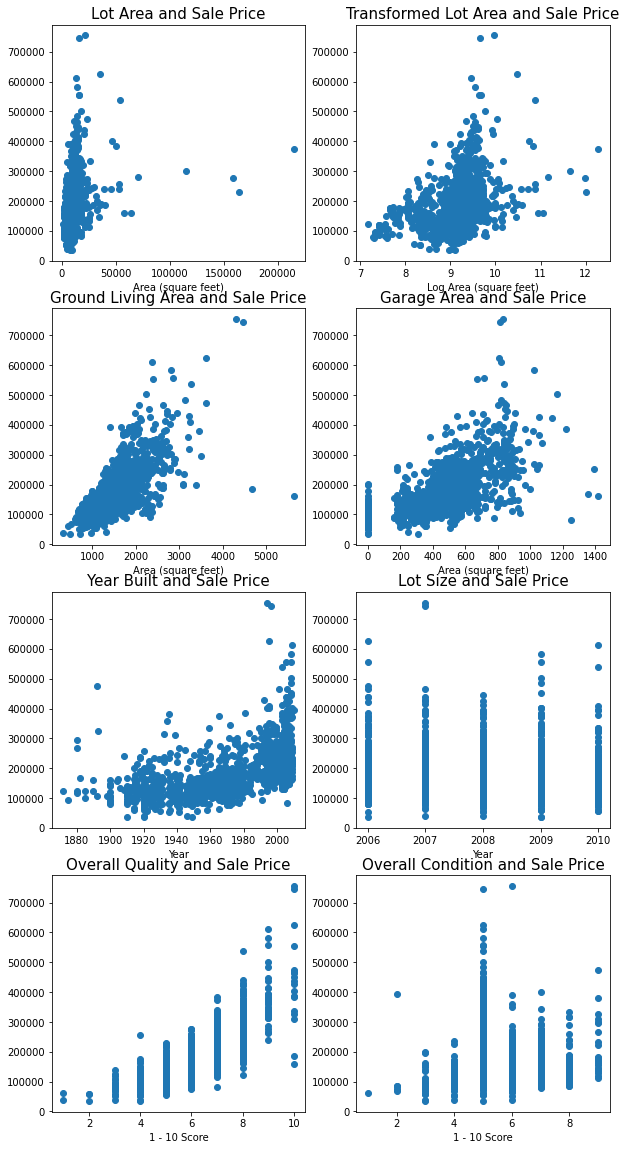

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
title_size = {'fontsize': 15}
axes[0,0].scatter(x='LotArea',y='SalePrice', data=dataset)
axes[0,0].set_title('Lot Area and Sale Price', fontdict=title_size)
axes[0,0].set_xlabel('Area (square feet)')
axes[0,1].scatter(x=np.log(dataset['LotArea']),y='SalePrice', data=dataset)
axes[0,1].set_title('Transformed Lot Area and Sale Price', fontdict=title_size)
axes[0,1].set_xlabel('Log Area (square feet)')

axes[1,0].scatter(x='GrLivArea',y='SalePrice', data=dataset)
axes[1,0].set_title('Ground Living Area and Sale Price', fontdict=title_size)
axes[1,0].set_xlabel('Area (square feet)')
axes[1,1].scatter(x='GarageArea',y='SalePrice', data=dataset)
axes[1,1].set_title('Garage Area and Sale Price', fontdict=title_size)
axes[1,1].set_xlabel('Area (square feet)')

axes[2,0].scatter(x='YearBuilt',y='SalePrice', data=dataset)
axes[2,0].set_title('Year Built and Sale Price', fontdict=title_size)
axes[2,0].set_xlabel('Year')
axes[2,1].scatter(x='YrSold',y='SalePrice', data=dataset)
axes[2,1].set_title('Lot Size and Sale Price', fontdict=title_size)
axes[2,1].set_xlabel('Year')

axes[3,0].scatter(x='OverallQual',y='SalePrice', data=dataset)
axes[3,0].set_title('Overall Quality and Sale Price', fontdict=title_size)
axes[3,0].set_xlabel('1 - 10 Score')
axes[3,1].scatter(x='OverallCond',y='SalePrice', data=dataset)
axes[3,1].set_title('Overall Condition and Sale Price', fontdict=title_size)
axes[3,1].set_xlabel('1 - 10 Score')

Text(0.04, 0.5, 'Sale Price ($)')

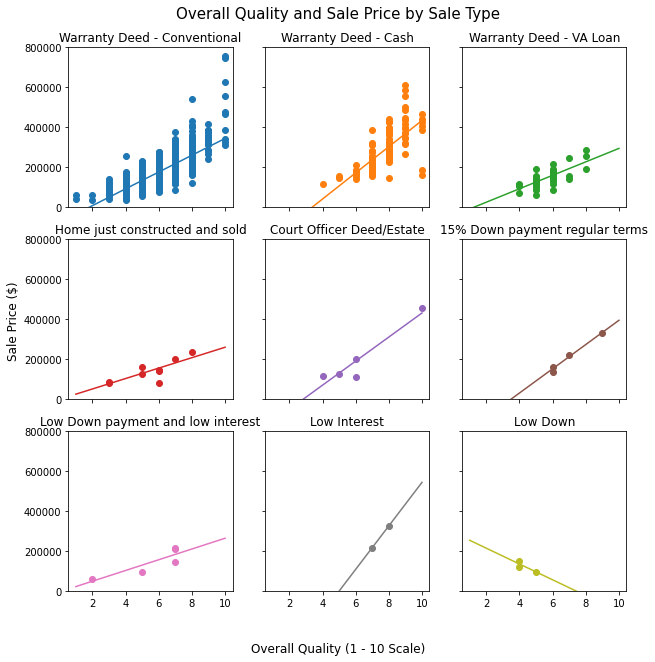

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharey=True, sharex=True)
colour = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
names = ['Warranty Deed - Conventional',
'Warranty Deed - Cash',
'Warranty Deed - VA Loan',
'Home just constructed and sold',
'Court Officer Deed/Estate',
'15% Down payment regular terms',
'Low Down payment and low interest',
'Low Interest',
'Low Down',
'Other']
counter = 0
sale_type = dataset['SaleType'].unique()

for stype in sale_type:
    g_row = counter // 3
    g_col = counter % 3
    
    sale = dataset[dataset['SaleType']==stype].SalePrice
    qual = dataset[dataset['SaleType']==stype].OverallQual
    axes[g_row, g_col].scatter(x=qual,y=sale, c=colour[counter])
    axes[g_row, g_col].set_ylim(0,800000)
    
    name = names[counter]
    axes[g_row, g_col].set_title(name)
    
    model = LinearRegression()
    model.fit(np.array(qual).reshape(-1, 1), np.array(sale).reshape(-1, 1))
    x_new = np.linspace(1, 10, 10)
    y_new = model.predict(x_new[:, np.newaxis])
    axes[g_row, g_col].plot(x_new, y_new, c=colour[counter])
    counter += 1
    
fig.text(0.5, 0.92, 'Overall Quality and Sale Price by Sale Type', ha='center', fontdict={'fontsize': 15})
fig.text(0.5, 0.04, 'Overall Quality (1 - 10 Scale)', ha='center', fontdict={'fontsize': 12})
fig.text(0.04, 0.5, 'Sale Price ($)', va='center', rotation='vertical', fontdict={'fontsize': 12})

Text(0.04, 0.5, 'Sale Price ($)')

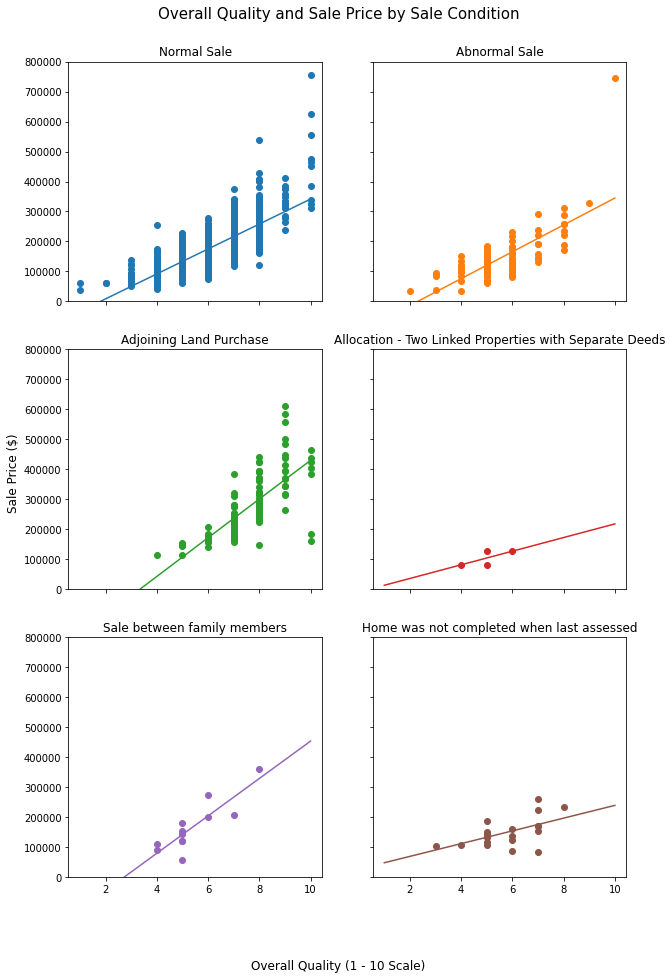

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15), sharey=True, sharex=True)
colour = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
names = ['Normal Sale',
'Abnormal Sale',
'Adjoining Land Purchase',
'Allocation - Two Linked Properties with Separate Deeds',
'Sale between family members',
'Home was not completed when last assessed']
counter = 0
sale_type = dataset['SaleCondition'].unique()

for stype in sale_type:
    g_row = counter // 2
    g_col = counter % 2
    
    sale = dataset[dataset['SaleCondition']==stype].SalePrice
    qual = dataset[dataset['SaleCondition']==stype].OverallQual
    axes[g_row, g_col].scatter(x=qual,y=sale, c=colour[counter])
    axes[g_row, g_col].set_ylim(0,800000)
    
    name = names[counter]
    axes[g_row, g_col].set_title(name)
    
    model = LinearRegression()
    model.fit(np.array(qual).reshape(-1, 1), np.array(sale).reshape(-1, 1))
    x_new = np.linspace(1, 10, 10)
    y_new = model.predict(x_new[:, np.newaxis])
    axes[g_row, g_col].plot(x_new, y_new, c=colour[counter])
    counter += 1
    
fig.text(0.5, 0.92, 'Overall Quality and Sale Price by Sale Condition', ha='center', fontdict={'fontsize': 15})
fig.text(0.5, 0.04, 'Overall Quality (1 - 10 Scale)', ha='center', fontdict={'fontsize': 12})
fig.text(0.04, 0.5, 'Sale Price ($)', va='center', rotation='vertical', fontdict={'fontsize': 12})

### <a id = "MS">Missing Data </a>

In [12]:
missing_data_df={}
for column in dataset.columns:
    if dataset[column].isnull().sum() > 0:
        missing_data_df[column]=(dataset[column].isnull().sum()  /  len(dataset[column]) ) * 100

#Create missing values dataframe
missing_data_df=pd.DataFrame(missing_data_df,index=['MissingValues']).T.sort_values(by='MissingValues',ascending=False)

In [13]:
# features with highest proportion of missing values
missing_data_df[missing_data_df['MissingValues'] > 5].T

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
MissingValues,99.520548,96.30137,93.767123,80.753425,47.260274,17.739726,5.547945,5.547945,5.547945,5.547945,5.547945


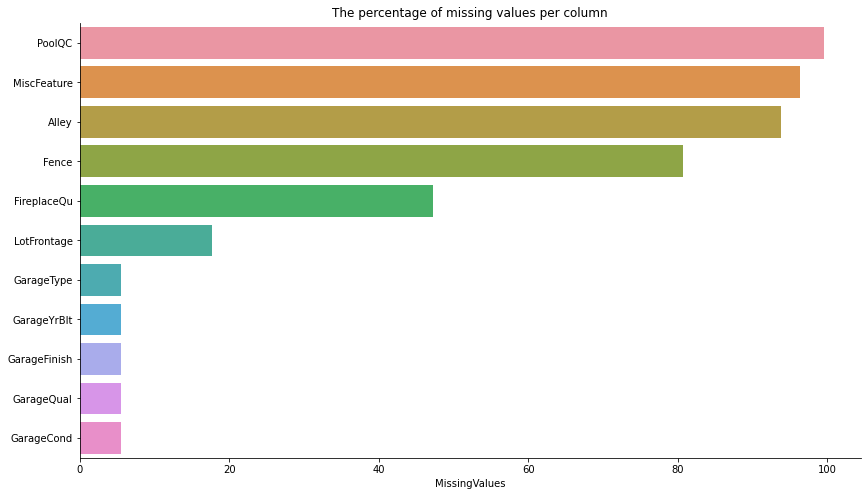

In [14]:
#Plotting proportion of missing values per column
plt.figure(figsize=(14,8))
sns.barplot(x=missing_data_df[missing_data_df['MissingValues'] > 5].MissingValues,y=missing_data_df[missing_data_df['MissingValues'] > 5].index).set_title('The percentage of missing values per column')
sns.despine()

More missing data is found in categorical data columns, with features such as `PoolQC`, `MiscFeature`, `Alley` and `Fence` containing the most missing. The removal of these features may allow for the model to focus on data which relates to more houses.

In [15]:
#Sort transposed summary statistics by count
describe_categorical = dataset.describe(include='object').T.sort_values(by=['count'])
describe_categorical.head(10)

,count,unique,top,freq
PoolQC,7,3,Gd,3
MiscFeature,54,4,Shed,49
Alley,91,2,Grvl,50
Fence,281,4,MnPrv,157
FireplaceQu,770,5,Gd,380
GarageCond,1379,5,TA,1326
GarageQual,1379,5,TA,1311
GarageFinish,1379,3,Unf,605
GarageType,1379,6,Attchd,870
BsmtExposure,1422,4,No,953


In [16]:
#Sort transposed summary statistics by count
describe_numeric = dataset.describe(include='number').T.sort_values(by=['count'])
describe_numeric.head(10)

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.00,1980.0,2002.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.00,1.0,1.00,3.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.00,6.0,7.00,14.0
Fireplaces,1460.0,0.613014,0.644666,0.0,0.00,1.0,1.00,3.0
GarageCars,1460.0,1.767123,0.747315,0.0,1.00,2.0,2.00,4.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0
WoodDeckSF,1460.0,94.244521,125.338794,0.0,0.00,0.0,168.00,857.0


In [17]:
# removing categorical features with greater than 50% missing data
dataset = dataset.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)
testset = testset.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

### <a id = "C">Correlations </a>

Correlations between features are graphed below for a better understanding of relationships within features of the dataset.

<AxesSubplot:title={'center':'Correlation Matrix'}>

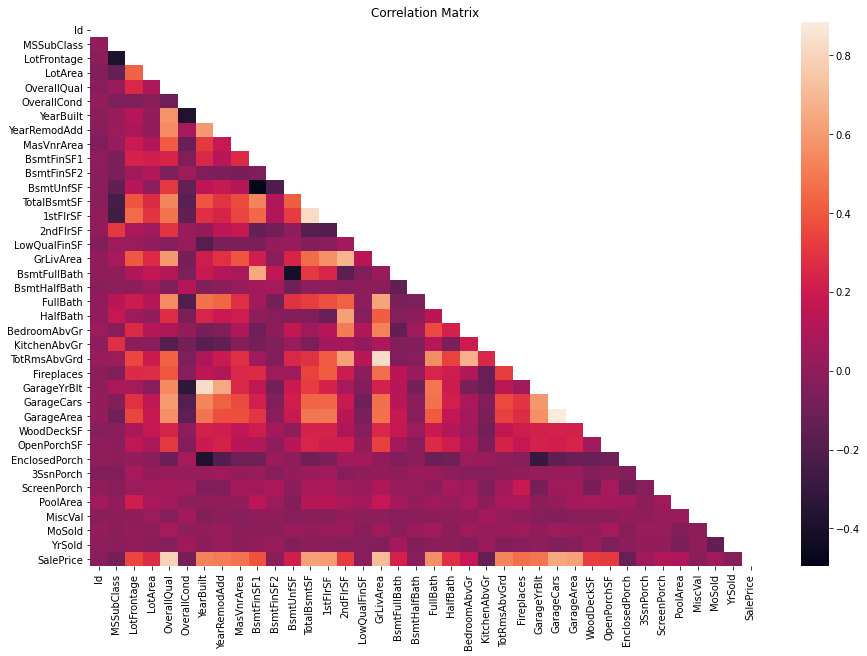

In [18]:
# correlation matrix of all features
corr = dataset.corr()
mask = np.triu(corr)
plt.figure(figsize=(15,10))
plt.title('Correlation Matrix')
sns.heatmap(corr, mask=mask)

Overall quality (`OverallQual`), ground living area (`GrLivArea`) and the two garage features (`GarageCars` and `GarageArea`) appear to be the most associated with sale price. These may be some of the most useful features for the algorithm in training. However, these features appear to be correlated above 0.59 with each other, meaning colllinearity may be a concern. In terms of this dataset, these features may contain largely overlapping information.

In [19]:
# features most positively correlated with target
dataset.corrwith(dataset['SalePrice']).sort_values(ascending=False).head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
dtype: float64

In [20]:
# features most negatively correlated with target
small_corr = dataset.corrwith(dataset['SalePrice']).sort_values(ascending=True).head(20)

# removing features with little association with sale price
unimportant_vars = small_corr[(small_corr < .1) & (small_corr > -.1)].index
disp_columns(unimportant_vars)

- MSSubClass       - OverallCond      - YrSold           - LowQualFinSF     
- Id               - MiscVal          - BsmtHalfBath     - BsmtFinSF2       
- 3SsnPorch        - MoSold           - PoolArea         


In [21]:
# dropping features with weak associations to sale price
dataset = dataset.drop(unimportant_vars, axis=1)
testset = testset.drop(unimportant_vars, axis=1)

Some pairs of features demonstrate very high associations, making the inclusion of one of the two a consideration. For example, `GarageCars` and `GarageArea` demonstrate a correlation of `0.88`. Both features theoretically and statistically, it appears that they contain very similar information about sale price.

Other pairs worth consideration are:
- `GarageYrBlt` and `YearBuilt`, 
- `GrLivArea` and `TotRmsAbvGrd`, and 
- `TotalBsmtSF` and `1stFlrSF`. 

The first of which demonstrate self-evident theoretical overlap. Thus, exclusion of `GarageYrBlt` appears reasonable. For the second pair, rooms above grade (`TotRmsAbvGrd`) and ground living space statistically demonstrate high similarity. Evidently, the more rooms in the house, generally the larger the ground living area. Finally, total basement square feet is associated with first floor square feet.

`GarageYrBlt` and `TotRmsAbvGrd` both demonstrate lower association with sale price than their pair. This may suggest that the difference between them and their pair is noise when aiming to predict sale price. Based on these grounds they can be removed.

In [22]:
# finding the correlations stronger than 0.5 between features
corr = dataset.drop("SalePrice", axis=1).corr()
highest_corr = corr[corr > .5].unstack().dropna()
highest_corr = highest_corr[highest_corr != 1.0]
highest_corr = highest_corr.to_frame('Correlation').sort_values(by='Correlation', ascending=False)
highest_corr = highest_corr.iloc[np.arange(1,len(highest_corr), step=2),:]
print(highest_corr.to_string())

                           Correlation
GarageCars   GarageArea       0.882475
GarageYrBlt  YearBuilt        0.825667
GrLivArea    TotRmsAbvGrd     0.825489
TotalBsmtSF  1stFlrSF         0.819530
GrLivArea    2ndFlrSF         0.687501
BedroomAbvGr TotRmsAbvGrd     0.676620
BsmtFinSF1   BsmtFullBath     0.649212
YearRemodAdd GarageYrBlt      0.642277
GrLivArea    FullBath         0.630012
2ndFlrSF     TotRmsAbvGrd     0.616423
HalfBath     2ndFlrSF         0.609707
OverallQual  GarageCars       0.600671
GrLivArea    OverallQual      0.593007
YearBuilt    YearRemodAdd     0.592855
GarageCars   GarageYrBlt      0.588920
YearBuilt    OverallQual      0.572323
1stFlrSF     GrLivArea        0.566024
GarageYrBlt  GarageArea       0.564567
GarageArea   OverallQual      0.562022
FullBath     TotRmsAbvGrd     0.554784
YearRemodAdd OverallQual      0.550684
OverallQual  FullBath         0.550600
             GarageYrBlt      0.547766
YearBuilt    GarageCars       0.537850
OverallQual  TotalBsmtSF 

# <a id = "P">Preprocessing </a>

## <a id = "FE">Feature Engineering </a>

#### <a id = "GU">Garage Utility </a>

The dataset contains a few features which relate to garage. These can be used to create a composite garage feature which better relates to the sale price than any individual component.

GarageCars and GarageArea are the most associated features to sale price. A composite feature of these increases correlation with the sale price from `0.64` (`GarageCars` and `SalePrice`) to `0.68`. The inclusion of `GarageYrBlt` in this composite resulted in only `0.66`, leading to its omission. `GarageYrBlt` may be introducing unnecessary noise into the metric of garage utility.

Replacing the 3 garage features with the composite should increase generalisability to the training set through retaining important information and reducing feature number.

In [23]:
dataset[['GarageYrBlt', 'GarageCars', 'GarageArea']].corrwith(dataset['SalePrice']).sort_values(ascending=False).head(10)

GarageCars     0.640409
GarageArea     0.623431
GarageYrBlt    0.486362
dtype: float64

In [24]:
garage = pd.DataFrame(dataset['GarageCars']*dataset['GarageArea'])
garage.corrwith(dataset['SalePrice'])

0    0.680058
dtype: float64

In [25]:
dataset['GarageUtility'] = pd.DataFrame(dataset['GarageCars']*dataset['GarageArea'])
testset['GarageUtility'] = pd.DataFrame(testset['GarageCars']*testset['GarageArea'])

#### <a id = "TSF">Total Square Feet </a>

An engineered feature for total square feet appears to be one of the most associated with sale price. The combination of basement and first floor square feet results in a correlation of `0.64`. When second floor square feet was added, the correlation increased to `0.78`. This would be the second most associated feature to sale price behind overall quality which demonstrates `0.79`.

In [26]:
dataset[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']].corrwith(dataset['SalePrice']).sort_values(ascending=False).head(10)

TotalBsmtSF    0.613581
1stFlrSF       0.605852
2ndFlrSF       0.319334
dtype: float64

In [27]:
TotalSF = pd.DataFrame(dataset['TotalBsmtSF']+dataset['1stFlrSF']+dataset['2ndFlrSF'])
TotalSF.corrwith(dataset['SalePrice'])

0    0.78226
dtype: float64

In [28]:
dataset = dataset.drop(['GarageYrBlt', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)
testset = testset.drop(['GarageYrBlt', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)

## <a id = "HM">Handling Missing Values </a>

#### <a id = "HMN">Numeric </a>

Due to the inherent skew in real estate data, the median is used for missing data values. This is applied to both the training and test data.

In [29]:
# replace missing numeric data with median
describe_numeric = dataset.describe(include='number').T.sort_values(by=['count'])
test_missing = testset.describe(include='number').T.sort_values(by=['count'])

for column in describe_numeric.index:
    null_count = dataset[column].isnull().sum()
    if null_count > 0:
        print(column, null_count)
        
for column in test_missing.index:
    null_count = testset[column].isnull().sum()
    if null_count > 0:
        testset[column].fillna(testset[column].median(),inplace=True)

LotFrontage 259
MasVnrArea 8


In [30]:
dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].median(),inplace=True)
dataset['LotFrontage'].fillna(dataset['LotFrontage'].median(),inplace=True)

#### Training Dataset

In [31]:
# check all numeric features have complete values
data_missing = dataset.describe(include='number').T.sort_values(by=['count'])
data_missing.head(8)

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,69.863699,22.027677,21.0,60.0,69.0,79.0,313.0
ScreenPorch,1460.0,15.060959,55.757415,0.0,0.0,0.0,0.0,480.0
EnclosedPorch,1460.0,21.954110,61.119149,0.0,0.0,0.0,0.0,552.0
OpenPorchSF,1460.0,46.660274,66.256028,0.0,0.0,25.0,68.0,547.0
WoodDeckSF,1460.0,94.244521,125.338794,0.0,0.0,0.0,168.0,857.0
Fireplaces,1460.0,0.613014,0.644666,0.0,0.0,1.0,1.0,3.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.0,6.0,7.0,14.0
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.0,1.0,1.0,3.0


#### Test Dataset

In [32]:
# check all categorical features have complete values
test_missing = testset.describe(include='number').T.sort_values(by=['count'])
test_missing.head(8)

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1459.0,68.334476,20.569211,21.0,60.0,67.0,78.0,200.0
EnclosedPorch,1459.0,24.243317,67.227765,0.0,0.0,0.0,0.0,1012.0
OpenPorchSF,1459.0,48.313914,68.883364,0.0,0.0,28.0,72.0,742.0
WoodDeckSF,1459.0,93.174777,127.744882,0.0,0.0,0.0,168.0,1424.0
Fireplaces,1459.0,0.581220,0.647420,0.0,0.0,0.0,1.0,4.0
TotRmsAbvGrd,1459.0,6.385195,1.508895,3.0,5.0,6.0,7.0,15.0
KitchenAbvGr,1459.0,1.042495,0.208472,0.0,1.0,1.0,1.0,2.0
BedroomAbvGr,1459.0,2.854010,0.829788,0.0,2.0,3.0,3.0,6.0


In [33]:
# replace missing numeric data with median
describe_numeric = dataset.describe(include='number').T.sort_values(by=['count'])

for column in describe_numeric.index:
    null_count = dataset[column].isnull().sum()
    if null_count > 0:
        print(column, null_count)
        
for column in test_missing.index:
    null_count = testset[column].isnull().sum()
    if null_count > 0:
        testset[column].fillna(testset[column].median(),inplace=True)

In [34]:
dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].median(),inplace=True)
dataset['LotFrontage'].fillna(dataset['LotFrontage'].median(),inplace=True)

#### <a id = "HMC">Categorical </a>

Most of the categorical features contain most of its values. Missing data is not as much of a concern with categorical since these will be one-hot-encoded later and missing values will be recorded as `0` for all options.

In [35]:
# check all categorical features have complete values
data_missing = dataset.describe(include='object').T.sort_values(by=['count'])
data_missing.head(8)

,count,unique,top,freq
FireplaceQu,770,5,Gd,380
GarageCond,1379,5,TA,1326
GarageQual,1379,5,TA,1311
GarageFinish,1379,3,Unf,605
GarageType,1379,6,Attchd,870
BsmtExposure,1422,4,No,953
BsmtFinType2,1422,6,Unf,1256
BsmtQual,1423,4,TA,649


## <a id = "FP">Final Preprocessing </a>

In [36]:
train = dataset.drop(['SalePrice'], axis=1)
target = dataset['SalePrice']

submission = testset

In [37]:
submission.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1459.0,68.334476,20.569211,21.0,60.0,67.0,78.0,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.0,9399.0,11517.5,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.0,6.0,7.0,10.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.0,1973.0,2001.0,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.0,1992.0,2004.0,2010.0
MasVnrArea,1459.0,99.673749,177.001792,0.0,0.0,0.0,162.0,1290.0
BsmtFinSF1,1459.0,439.142906,455.117812,0.0,0.0,350.5,752.0,4010.0
BsmtUnfSF,1459.0,554.230295,437.117479,0.0,219.5,460.0,797.5,2140.0
GrLivArea,1459.0,1486.045922,485.566099,407.0,1117.5,1432.0,1721.0,5095.0
BsmtFullBath,1459.0,0.433859,0.530527,0.0,0.0,0.0,1.0,3.0


#### <a id = "OHE">One-Hot Encoding </a>

In [38]:
describe_categorical = dataset.describe(include='object').T.sort_values(by=['count'])

train = pd.get_dummies(train, columns = describe_categorical.index)
submission = pd.get_dummies(submission, columns = describe_categorical.index)

In [39]:
#train.head()

In [40]:
#submission.head()

In [41]:
# select training data based on availablility of data in test set
sub_columns = []
for column in submission.columns:
    sub_columns.append(column)

train = train[sub_columns]

#### <a id = "ST">Scaler Transformation </a>

In [42]:
train = RobustScaler().fit_transform(train)
submission = RobustScaler().fit_transform(submission)

In [43]:
print("Training dataset shape:", train.shape)

Training dataset shape: (1460, 244)


#### <a id = "STV">Splitting Training and Validation Data </a>

In [44]:
D_train, D_test, t_train, t_test = train_test_split(train, target, test_size=.2)

# <a id = "MF">Model Fitting </a>

Based on preliminary model fitting, the Random Forest, Gradient Boosting, Extreme Gradient Boosting and Extra Trees algorithms demonstrate the best performance. However, the difference between train and test RSME for Extra Trees demonstrates severe overfitting. Random Forest and Gradient Boosting also show overfitting, although it is less severe. Random Forest and Gradient boosting algorithms are hyperparameter tuned with a cross validation grid search. Random Forest provides a baseline for potential improvement through hyperparameter tuning, while Gradient Boosting is the best performer.

Side note, the SVR algorithm appears to be severely underfitting and does not appear suitable for this task.

In [45]:
def rsme(model, D_data, t_data):
    preds = model.predict(D_data)
    rsme = sqrt(mean_squared_error(t_data, preds))
    return round(rsme,1)

In [46]:
models = [RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor(), SVR(), ExtraTreesRegressor()]
names = ['Random Forest', 'Gradient Boosting', 'XGB', 'SVR', 'Extra Trees']
train = []
test = []

for model in models:
    model.fit(D_train, t_train)
    train.append(rsme(model, D_train, t_train))
    test.append(rsme(model, D_test, t_test))
    
performance = pd.DataFrame({"RSME train": train, 
                            "RSME test": test})
performance = performance.T
performance.columns = names

In [47]:
performance

,Random Forest,Gradient Boosting,XGB,SVR,Extra Trees
RSME train,12070.2,15007.1,1379.6,82042.0,155.2
RSME test,25264.1,23112.1,24464.3,80835.3,25768.7


## <a id = "MFHT">Hyperparameter Tuning </a>

#### <a id = "RFR">Random Forest Regressor </a>

The hyperparameter tuning demonstrated some but little improvement on the initial models. Therefore, to futher improve the performance of the model alterations in the preprocessing need to take place. These could include additional transformations for skewed data, engineered features and outliers removed.

In [48]:
cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=3, 
                                    random_state=822)

In [49]:
params_RF = {'n_estimators': [200, 300, 400, 500],
            'max_depth': [3, 6, 9, 12, 14, 17, 20]}

gs_RF = GridSearchCV(estimator = RandomForestRegressor(),
                     param_grid = params_RF,
                     cv = cv_method,
                     n_jobs = -1,
                     verbose = 1,
                     scoring = 'neg_mean_squared_error')

In [50]:
gs_RF.fit(D_train, t_train)

Fitting 30 folds for each of 28 candidates, totalling 840 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=822),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12, 14, 17, 20],
                         'n_estimators': [200, 300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [51]:
print("Best parameters:", gs_RF.best_params_)
print("Cross Validation Score:", gs_RF.best_score_)
print("Train RSME:", rsme(gs_RF, D_train, t_train))
print("Test RSME:", rsme(gs_RF, D_test, t_test))

Best parameters: {'max_depth': 14, 'n_estimators': 300}
Cross Validation Score: -1055061070.5915253
Train RSME: 12096.2
Test RSME: 25050.4


#### <a id = "GBR">Gradient Boosting Regressor </a>

In [52]:
params_GB = {'n_estimators': [200, 300, 400, 500],
            'max_depth': [1, 3, 6, 9, 12, 14, 17, 20],
            'learning_rate': [1, .1, .01]}

gs_GB = GridSearchCV(estimator = GradientBoostingRegressor(),
                     param_grid = params_GB,
                     cv = cv_method,
                     n_jobs = -1,
                     verbose = 1,
                     scoring = 'neg_mean_squared_error')

In [53]:
gs_GB.fit(D_train, t_train)

Fitting 30 folds for each of 96 candidates, totalling 2880 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=822),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [1, 0.1, 0.01],
                         'max_depth': [1, 3, 6, 9, 12, 14, 17, 20],
                         'n_estimators': [200, 300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [54]:
print("Best parameters:", gs_GB.best_params_)
print("Cross Validation Score:", gs_GB.best_score_)
print("Train RSME:", rsme(gs_GB, D_train, t_train))
print("Test RSME: ", rsme(gs_GB, D_test, t_test))

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Cross Validation Score: -886219170.6402187
Train RSME: 11529.8
Test RSME:  22145.0


## <a id = "TP">Testset Predictions </a>

In [55]:
preds = gs_GB.predict(submission)
submissioncsv['SalePrice'] = preds
submissioncsv.head(10)

,Id,SalePrice
0,1461,130755.012868
1,1462,154065.853145
2,1463,188158.845043
3,1464,189203.294076
4,1465,214676.213460
5,1466,183215.366854
6,1467,178060.290476
7,1468,176466.352096
8,1469,188632.918687
9,1470,141720.492961


In [56]:
submissioncsv.to_csv('C:/Users/Alex/Documents/Projects/house prices kaggle/house-prices-advanced-regression-techniques/submission_gradientboost.csv', index=False)